In [18]:
# Step 1: Load and clean the dataset
import pandas as pd
df = pd.read_csv("data.csv")  # ← Load your CSV file here
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')  # Drop unnecessary columns
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # Convert 'M' = 1, 'B' = 0 for binary classification

In [20]:
#Step 2: Choose features and labels (Binary Classification)
X = df.drop(columns=["diagnosis"])  # Features
y = df["diagnosis"]                # Target: Malignant = 1, Benign = 0

In [22]:
# Step 3: Train/test split and standardize features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split: 80% train, 20% test, with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features to mean=0, std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#Step 4: Fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Confusion Matrix:
 [[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC Score: 0.996


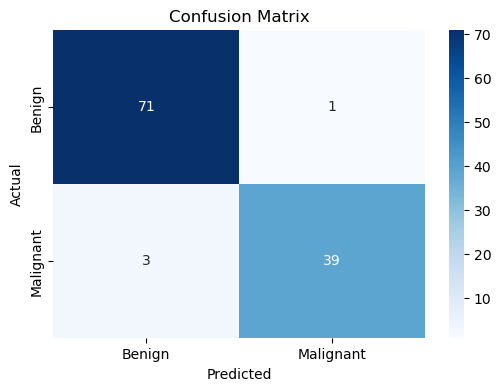

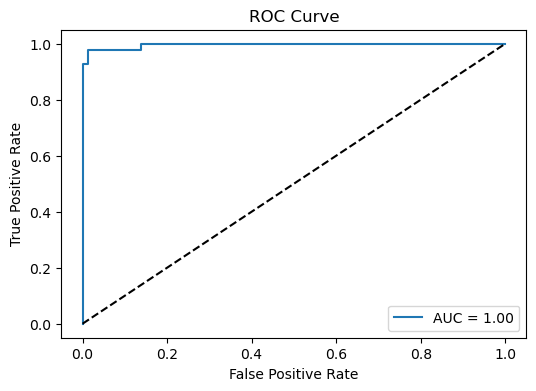

In [26]:
# Evaluate with confusion matrix, precision, recall, ROC-AUC
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Predict class probabilities and labels
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities
y_pred = model.predict(X_test_scaled)               # Predicted classes

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


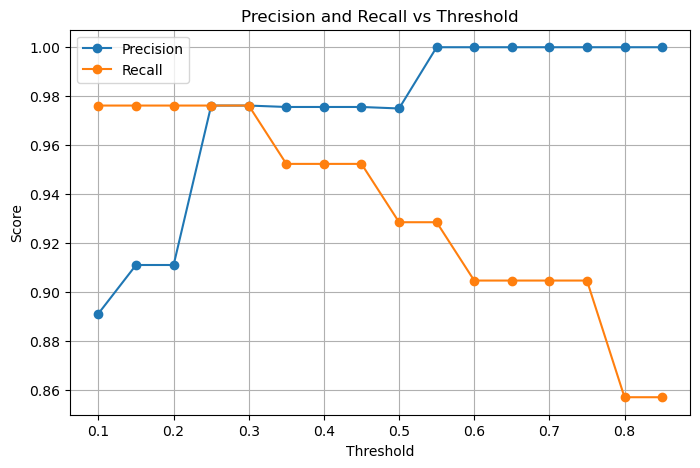

In [28]:
# Tune threshold and analyze precision/recall trade-off
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.05)
precision_scores = []
recall_scores = []

for thresh in thresholds:
    y_thresh_pred = (y_probs >= thresh).astype(int)
    cm_thresh = confusion_matrix(y_test, y_thresh_pred)
    tn, fp, fn, tp = cm_thresh.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot Precision and Recall vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label="Precision", marker='o')
plt.plot(thresholds, recall_scores, label="Recall", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

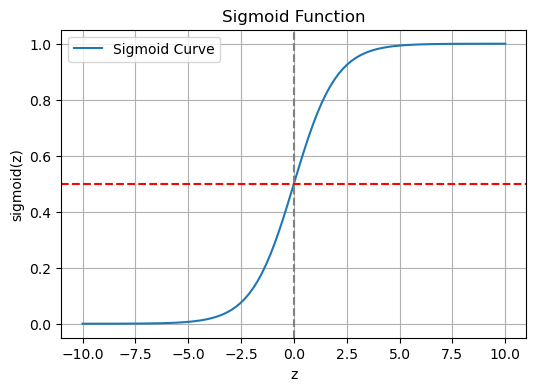

In [30]:
# Explain sigmoid function used in logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot the sigmoid function
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(6, 4))
plt.plot(z, sig, label="Sigmoid Curve")
plt.axvline(0, color="gray", linestyle="--")
plt.axhline(0.5, color="red", linestyle="--")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.legend()
plt.show()